## Time Series - Dock 380

In [1]:
import pandas as pd
from matplotlib import pyplot
import pandas.tools.plotting as ts
import statsmodels.graphics.tsaplots as tsa
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
dataDir = r"C:/Ramya Dhatri/Intro To Data Science/Project/Dock/Dock_380/"
train_df = pd.read_csv(dataDir+'train_380.csv', sep='\t')
test_df = pd.read_csv(dataDir+'test_380.csv', sep='\t')
train_df.avail_bikes = train_df.avail_bikes.astype(float)
test_df.avail_bikes = test_df.avail_bikes.astype(float)
train_series = pd.Series(train_df['avail_bikes'].values, index=train_df['timestamp'])
test_series = pd.Series(test_df['avail_bikes'].values, index=test_df['timestamp'])

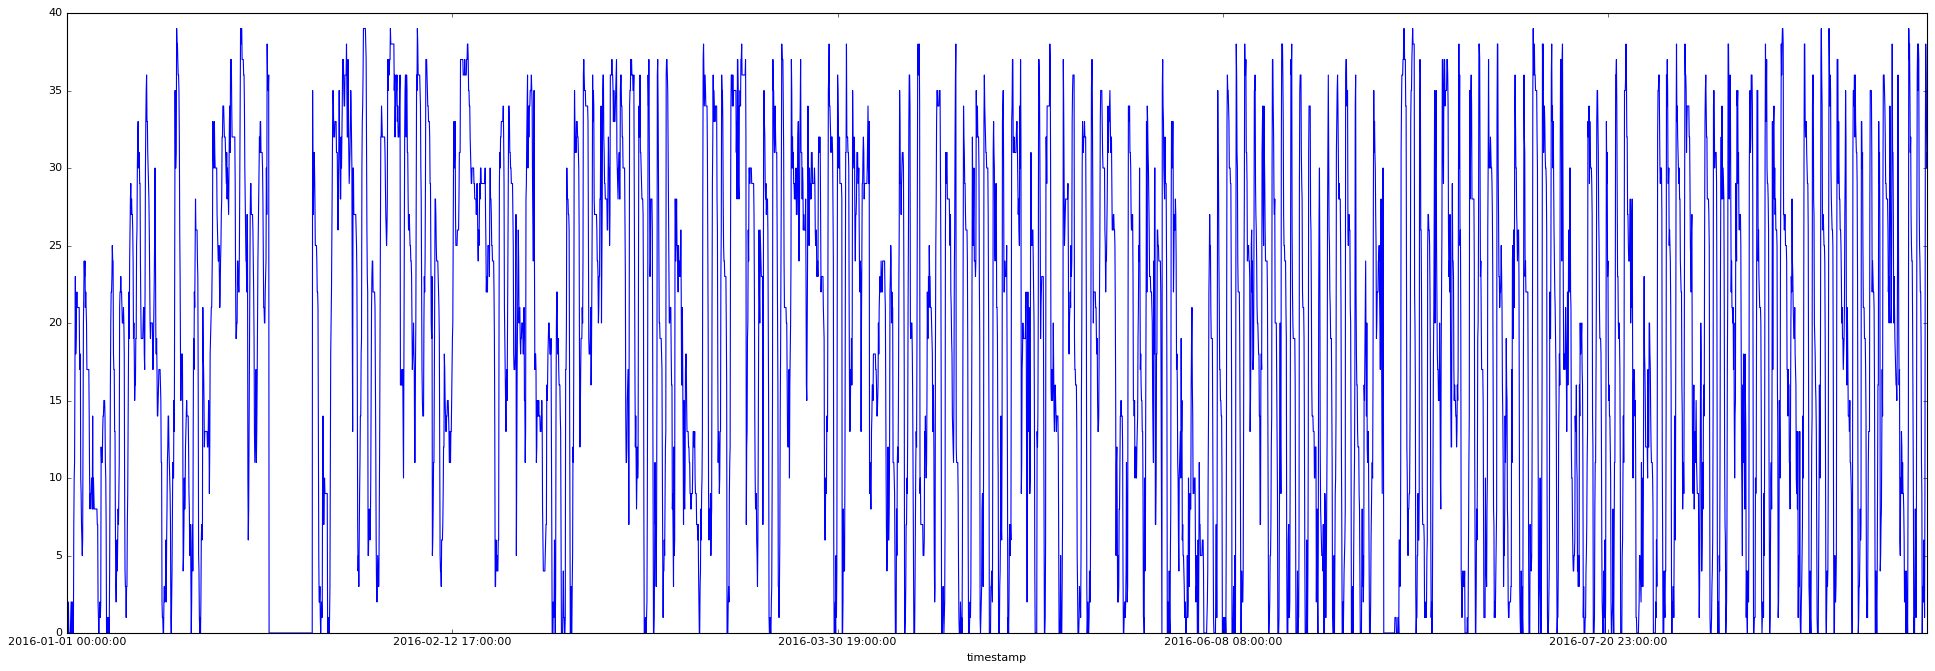

In [3]:
pyplot.figure(figsize=(30,10))
train_series.plot()
pyplot.show()

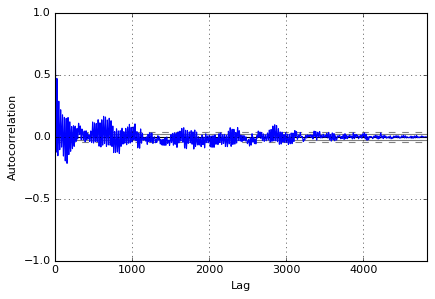

In [4]:
ts.autocorrelation_plot(train_series)
pyplot.show()

It can be seen that the ACF plot has positive correlation at lag 1. Also, it alternates between positive and negative values and finally decays to zero. Hence, an AR model would be suitable for this data.

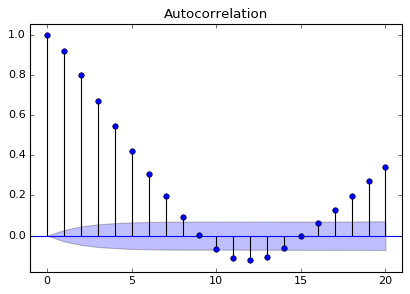

In [6]:
tsa.plot_acf(train_series, lags=20)
pyplot.show()

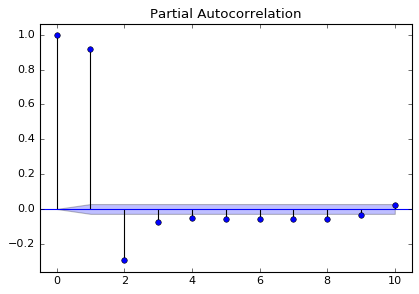

In [7]:
tsa.plot_pacf(train_series, lags=10)
pyplot.show()

As only 7 lags are significant in the PACF plot, we go ahead with fitting an AR(7) model.

predicted=30.738083, expected=28.000000
predicted=27.170693, expected=38.000000
predicted=38.531060, expected=38.000000
predicted=35.219400, expected=32.000000
predicted=28.151034, expected=32.000000
predicted=29.810140, expected=31.000000
predicted=28.904696, expected=22.000000
predicted=18.799566, expected=21.000000
predicted=19.677054, expected=19.000000
predicted=17.802259, expected=14.000000
predicted=11.852499, expected=13.000000
predicted=12.243485, expected=14.000000
predicted=14.069598, expected=11.000000
predicted=10.294081, expected=13.000000
predicted=13.501265, expected=3.000000
predicted=2.108490, expected=4.000000
predicted=5.286543, expected=10.000000
predicted=12.395251, expected=2.000000
predicted=2.110355, expected=1.000000
predicted=2.588580, expected=3.000000
predicted=5.229996, expected=14.000000
predicted=17.577789, expected=27.000000
predicted=30.151775, expected=30.000000
predicted=31.169879, expected=32.000000
predicted=32.136336, expected=36.000000
predicted=

C:\Ramya Dhatri\Softwares\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=5.936791, expected=20.000000
predicted=24.161953, expected=37.000000
predicted=40.802777, expected=37.000000
predicted=36.647108, expected=37.000000
predicted=35.837809, expected=35.000000
predicted=33.607905, expected=36.000000
predicted=34.834996, expected=35.000000
predicted=33.501579, expected=30.000000
predicted=27.573388, expected=31.000000
predicted=28.782376, expected=31.000000
predicted=28.518248, expected=31.000000
predicted=28.578410, expected=30.000000
predicted=27.524173, expected=23.000000
predicted=19.967034, expected=13.000000
predicted=10.102869, expected=1.000000
predicted=-1.041000, expected=3.000000
predicted=3.933770, expected=2.000000
predicted=2.841910, expected=2.000000
predicted=2.941418, expected=10.000000
predicted=12.205917, expected=14.000000
predicted=15.667751, expected=11.000000
predicted=11.703152, expected=24.000000
predicted=27.265245, expected=36.000000
predicted=38.674226, expected=36.000000
predicted=35.601104, expected=37.000000
predicte

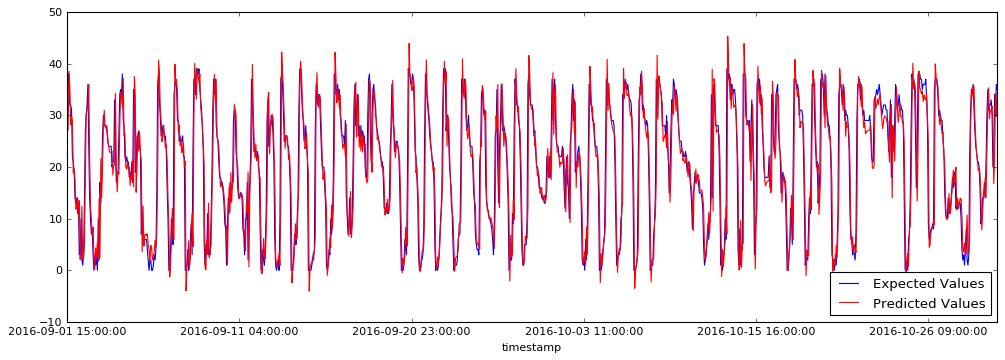

In [8]:
history = [x for x in train_series]
predictions = list()
for t in range(len(test_series)):
    model = ARIMA(history, order=(10,0,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_series[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_series, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.figure(figsize=(15,5))
test_series.plot(color = 'blue', label = 'Expected Values')
pyplot.plot(predictions, color='red', label = 'Predicted Values')
pyplot.legend(loc = 'lower right')
pyplot.show()

In [11]:
output_df = pd.DataFrame(columns=['DockID', 'Predicted', 'Expected', 'Predicted_Bin', 'Expected_Bin'])
for t in range(len(test_series)):
    pred = 0
    expect = 0
    if predictions[t] <= 5:
        pred = 1
    if test_series[t] <= 5:
        expect = 1
    output_df.loc[t] = ['380', predictions[t][0], test_series[t], pred, expect]
    
output_df.to_csv('output_380.csv', sep='\t')

output_df

,DockID,Predicted,Expected,Predicted_Bin,Expected_Bin
0,380,30.738083,28.0,0.0,0.0
1,380,27.170693,38.0,0.0,0.0
2,380,38.531060,38.0,0.0,0.0
3,380,35.219400,32.0,0.0,0.0
4,380,28.151034,32.0,0.0,0.0
5,380,29.810140,31.0,0.0,0.0
6,380,28.904696,22.0,0.0,0.0
7,380,18.799566,21.0,0.0,0.0
8,380,19.677054,19.0,0.0,0.0
9,380,17.802259,14.0,0.0,0.0
